In [ ]:

import json
import numpy as np
from collections import defaultdict
from tqdm import tqdm

with open("vocab.json", "r") as f:
    vocab = json.load(f)
word2idx = vocab["word2idx"]
vocab_size = len(word2idx)
with open("combined_dataset.json", "r") as f:
    data = json.load(f)

# ─── Initializing  co-occurrence matrix ─────────────────────────────
window_size = 5
cooccurrence = defaultdict(float)

for row in tqdm(data, desc="Building co-occurrence matrix"):
    tokens = row["tokens"]
    token_ids = [word2idx[t] for t in tokens if t in word2idx]

    for center_i, center_id in enumerate(token_ids):
        start = max(0, center_i - window_size)
        end = min(len(token_ids), center_i + window_size + 1)

        for context_i in range(start, end):
            if center_i == context_i:
                continue
            context_id = token_ids[context_i]
            distance = abs(center_i - context_i)
            if distance == 0:
                continue
            weight = 1.0 / distance
            cooccurrence[(center_id, context_id)] += weight

print(f"✅ Co-occurrence matrix built with {len(cooccurrence)} non-zero entries")


Building co-occurrence matrix: 100%|██████████| 43921/43921 [00:05<00:00, 7394.43it/s] 

✅ Co-occurrence matrix built with 1364327 non-zero entries


In [ ]:
import numpy as np
import random
from tqdm import tqdm


# ─── Hyperparameters ─────────────────────────────────────────────
embedding_dim = 100
x_max = 100
alpha = 0.75
learning_rate = 0.05
epochs = 50

# Initaialization
W = np.random.randn(vocab_size, embedding_dim) * 0.01
W_context = np.random.randn(vocab_size, embedding_dim) * 0.01
b = np.zeros(vocab_size)
b_context = np.zeros(vocab_size)

def f(x):
    return (x / x_max) ** alpha if x < x_max else 1.0

epoch_losses = []
cooc_items = list(cooccurrence.items())  #cache list

# Training loop
for epoch in range(1, epochs + 1):
    total_loss = 0.0
    random.shuffle(cooc_items)

    for (i, j), x_ij in tqdm(cooc_items, desc=f"Epoch {epoch}/{epochs}", unit="pair", leave=False):
        w_i = W[i]
        w_j = W_context[j]

        log_x = np.log(x_ij)
        weight = f(x_ij)
        dot = np.dot(w_i, w_j)
        diff = dot + b[i] + b_context[j] - log_x

        grad = weight * diff
        loss = 0.5 * grad * diff
        total_loss += loss

        W[i] -= learning_rate * grad * w_j
        W_context[j] -= learning_rate * grad * w_i
        b[i] -= learning_rate * grad
        b_context[j] -= learning_rate * grad

    epoch_losses.append(total_loss)
    print(f"✅ Epoch {epoch} complete — Total Loss: {total_loss:.2f}")


✅ Epoch 1 complete — Total Loss: 24213.96


✅ Epoch 2 complete — Total Loss: 22214.52


✅ Epoch 3 complete — Total Loss: 21369.07


✅ Epoch 4 complete — Total Loss: 19836.97


✅ Epoch 5 complete — Total Loss: 18344.11


✅ Epoch 6 complete — Total Loss: 17189.55


✅ Epoch 7 complete — Total Loss: 16262.26


✅ Epoch 8 complete — Total Loss: 15478.88


✅ Epoch 9 complete — Total Loss: 14790.15


✅ Epoch 10 complete — Total Loss: 14185.97


✅ Epoch 11 complete — Total Loss: 13642.28


✅ Epoch 12 complete — Total Loss: 13156.86


✅ Epoch 13 complete — Total Loss: 12714.51


✅ Epoch 14 complete — Total Loss: 12307.09


✅ Epoch 15 complete — Total Loss: 11938.08


✅ Epoch 16 complete — Total Loss: 11598.11


✅ Epoch 17 complete — Total Loss: 11280.03


✅ Epoch 18 complete — Total Loss: 10988.97


✅ Epoch 19 complete — Total Loss: 10715.06


✅ Epoch 20 complete — Total Loss: 10455.38


✅ Epoch 21 complete — Total Loss: 10212.55


✅ Epoch 22 complete — Total Loss: 9980.44


✅ Epoch 23 complete — Total Loss: 9760.37


✅ Epoch 24 complete — Total Loss: 9550.89


✅ Epoch 25 complete — Total Loss: 9350.69


✅ Epoch 26 complete — Total Loss: 9159.48


✅ Epoch 27 complete — Total Loss: 8976.64


✅ Epoch 28 complete — Total Loss: 8801.57


✅ Epoch 29 complete — Total Loss: 8634.00


✅ Epoch 30 complete — Total Loss: 8472.82


✅ Epoch 31 complete — Total Loss: 8317.41


✅ Epoch 32 complete — Total Loss: 8169.17


✅ Epoch 33 complete — Total Loss: 8025.30


✅ Epoch 34 complete — Total Loss: 7887.59


✅ Epoch 35 complete — Total Loss: 7754.23


✅ Epoch 36 complete — Total Loss: 7625.67


✅ Epoch 37 complete — Total Loss: 7501.97


✅ Epoch 38 complete — Total Loss: 7382.15


✅ Epoch 39 complete — Total Loss: 7266.93


✅ Epoch 40 complete — Total Loss: 7154.64


✅ Epoch 41 complete — Total Loss: 7046.91


✅ Epoch 42 complete — Total Loss: 6942.08


✅ Epoch 43 complete — Total Loss: 6840.68


✅ Epoch 44 complete — Total Loss: 6742.62


✅ Epoch 45 complete — Total Loss: 6647.53


✅ Epoch 46 complete — Total Loss: 6555.43


✅ Epoch 47 complete — Total Loss: 6466.24


✅ Epoch 48 complete — Total Loss: 6379.27


✅ Epoch 49 complete — Total Loss: 6295.59


✅ Epoch 50 complete — Total Loss: 6214.07


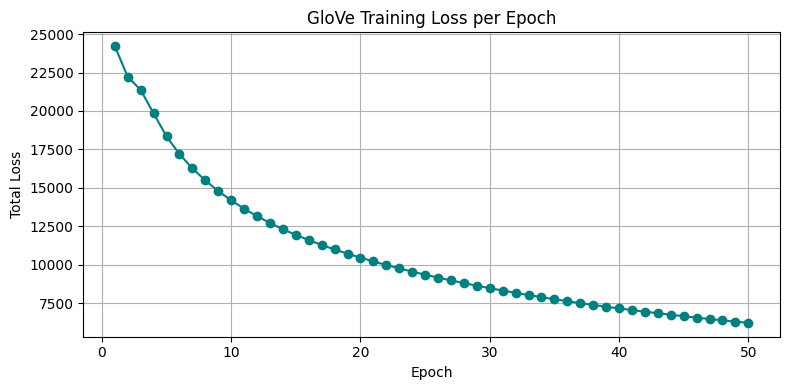

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs + 1), epoch_losses, marker='o', color='teal')
plt.title("GloVe Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
glove_embeddings = W + W_context
np.save("glove_embeddings.npy", glove_embeddings)
print("✅ Saved GloVe embeddings to glove_embeddings.npy")


✅ Saved GloVe embeddings to glove_embeddings.npy


In [ ]:
from google.colab import files

files.download('glove_embeddings.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analysis of both embeddings

In [ ]:

with open("vocab.json", "r") as f:
    vocab = json.load(f)
word2idx = vocab["word2idx"]
idx2word = {int(v): k for k, v in word2idx.items()}

w2v = np.load("embeddings.npy")
glove = np.load("glove_embeddings.npy")

print("✅ Loaded embeddings and vocabulary")


✅ Loaded embeddings and vocabulary


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_top_similar(word, embedding_matrix, top_n=5):
    if word not in word2idx:
        return f"{word} not in vocab."
    idx = word2idx[word]
    vec = embedding_matrix[idx].reshape(1, -1)
    sims = cosine_similarity(vec, embedding_matrix).flatten()
    top_idx = np.argsort(-sims)[1:top_n+1]
    return [(idx2word[i], sims[i]) for i in top_idx]

print("🔎 Word2Vec top similar to 'market':", get_top_similar("market", w2v))
print("🔎 GloVe top similar to 'market':", get_top_similar("market", glove))


🔎 Word2Vec top similar to 'market': [('otex', np.float64(0.3646919261232736)), ('fare', np.float64(0.36265590360582556)), ('aipickup', np.float64(0.35722641429086477)), ('aside', np.float64(0.3547938759909357)), ('lumina', np.float64(0.35411681871805456))]
🔎 GloVe top similar to 'market': [('atte', np.float64(0.8746458475550762)), ('midmorne', np.float64(0.8317634348245742)), ('brandnew', np.float64(0.8010725313678486)), ('emerge', np.float64(0.7530946557503886)), ('manipulation', np.float64(0.7331666845087979))]


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


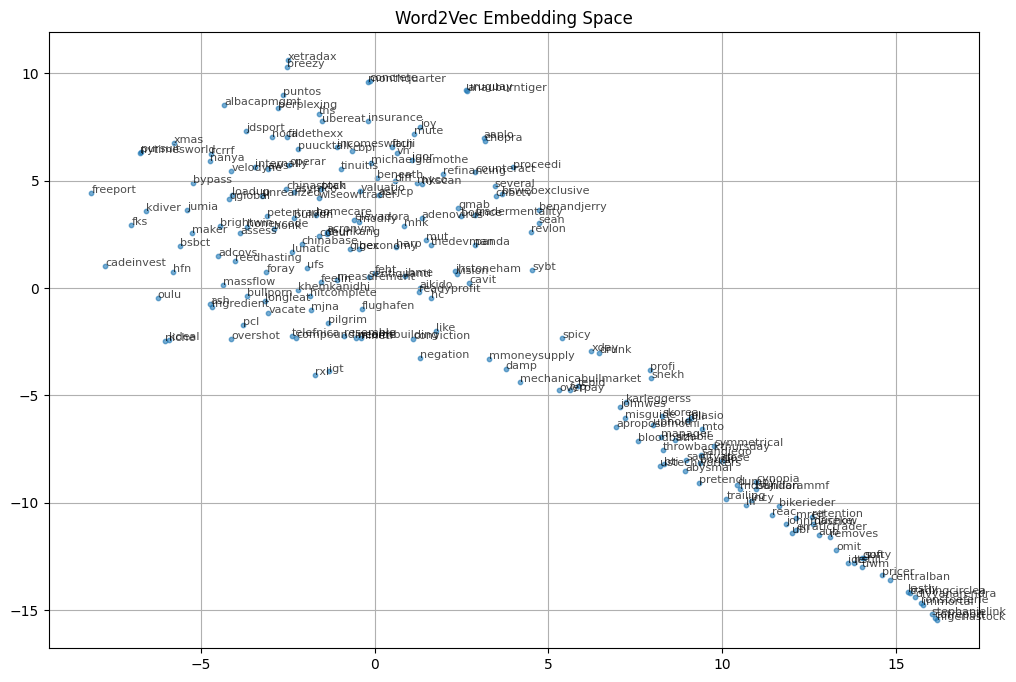

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


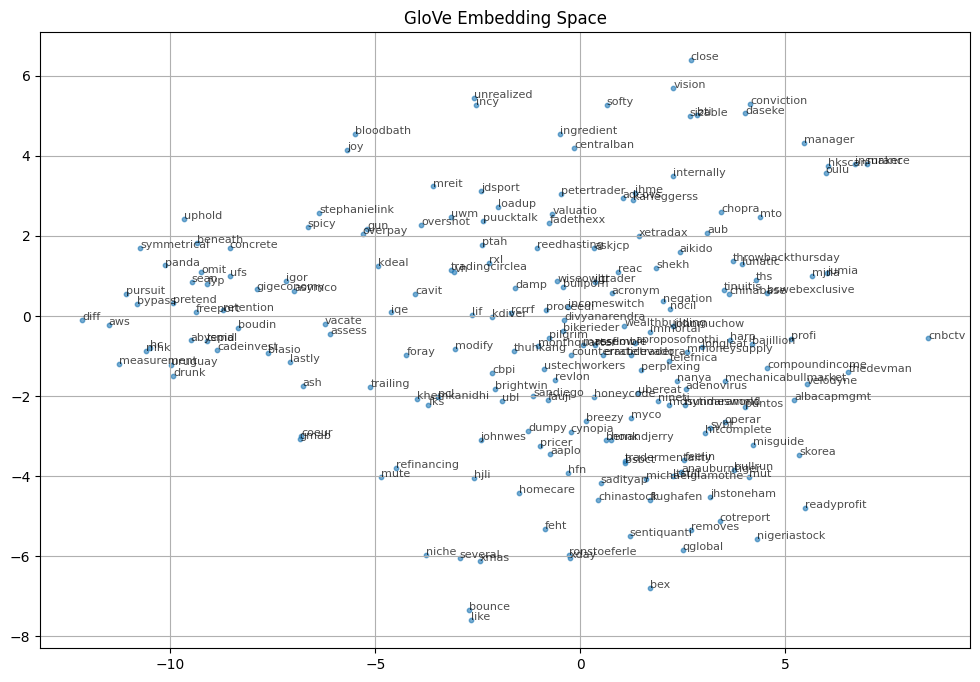

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

np.random.seed(42)
sample_idx = np.random.choice(len(word2idx), 200, replace=False)
labels = [idx2word[i] for i in sample_idx]

def plot_embedding_space(X, title):
    pca = PCA(n_components=20).fit_transform(X)
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)
    tsne_out = tsne.fit_transform(pca)

    plt.figure(figsize=(12, 8))
    plt.scatter(tsne_out[:, 0], tsne_out[:, 1], s=10, alpha=0.6)
    for i, label in enumerate(labels):
        plt.annotate(label, (tsne_out[i, 0], tsne_out[i, 1]), fontsize=8, alpha=0.7)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_embedding_space(w2v[sample_idx], "Word2Vec Embedding Space")
plot_embedding_space(glove[sample_idx], "GloVe Embedding Space")


In [ ]:
import pandas as pd

def embedding_stats(matrix, name="Embedding"):
    df = pd.DataFrame(matrix)
    print(f"\n📊 {name} Stats:")
    print(df.describe().T[["mean", "std", "min", "max", "50%"]].round(4))

embedding_stats(w2v, "Word2Vec")
embedding_stats(glove, "GloVe")



📊 Word2Vec Stats:
      mean     std     min     max     50%
0   0.0013  0.0113 -0.1891  0.2003  0.0011
1   0.0381  0.1026 -0.0395  1.1202  0.0068
2   0.0093  0.0275 -0.1113  0.4369  0.0037
3   0.0076  0.0230 -0.0812  0.2856  0.0033
4  -0.0140  0.0393 -0.3777  0.0833 -0.0044
..     ...     ...     ...     ...     ...
95 -0.0063  0.0199 -0.2607  0.1034 -0.0030
96  0.0360  0.0964 -0.0575  0.9589  0.0065
97  0.0060  0.0205 -0.1592  0.4505  0.0028
98 -0.0380  0.1025 -0.8594  0.0376 -0.0067
99 -0.0276  0.0746 -0.9046  0.0508 -0.0059

[100 rows x 5 columns]

📊 GloVe Stats:
      mean     std     min     max     50%
0   0.0013  0.0607 -1.3321  0.7897  0.0029
1  -0.0010  0.0652 -0.9265  1.6981 -0.0022
2   0.0010  0.0772 -1.9837  1.2158  0.0017
3   0.0000  0.0580 -1.1985  1.1412  0.0002
4  -0.0012  0.0705 -1.0255  2.0902 -0.0027
..     ...     ...     ...     ...     ...
95  0.0001  0.0553 -1.4549  0.9186  0.0009
96 -0.0002  0.0551 -1.1394  1.2120 -0.0006
97 -0.0011  0.0611 -0.9964  1.8410 -0.

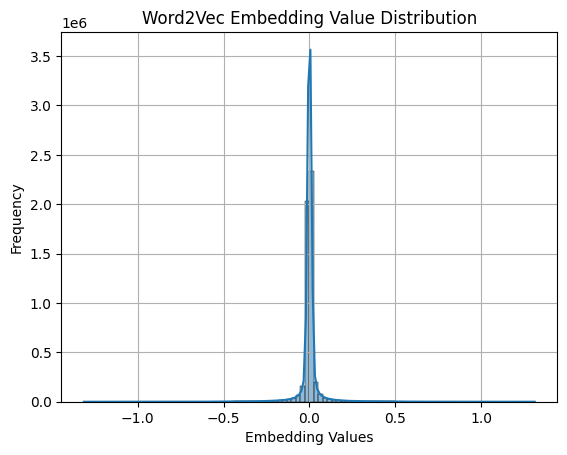

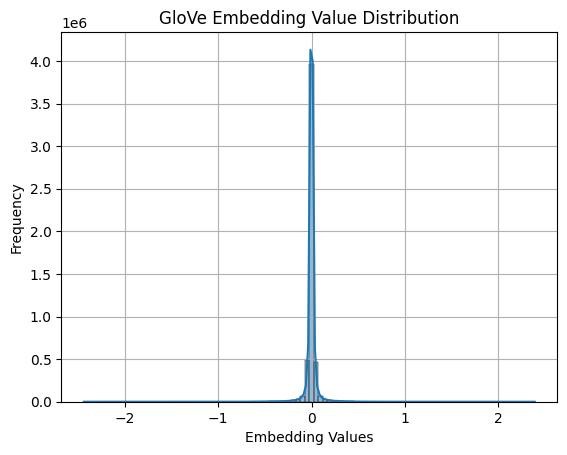

In [ ]:
import seaborn as sns

def plot_distribution(matrix, title):
    values = matrix.flatten()
    sns.histplot(values, bins=100, kde=True)
    plt.title(title)
    plt.xlabel("Embedding Values")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_distribution(w2v, "Word2Vec Embedding Value Distribution")
plot_distribution(glove, "GloVe Embedding Value Distribution")


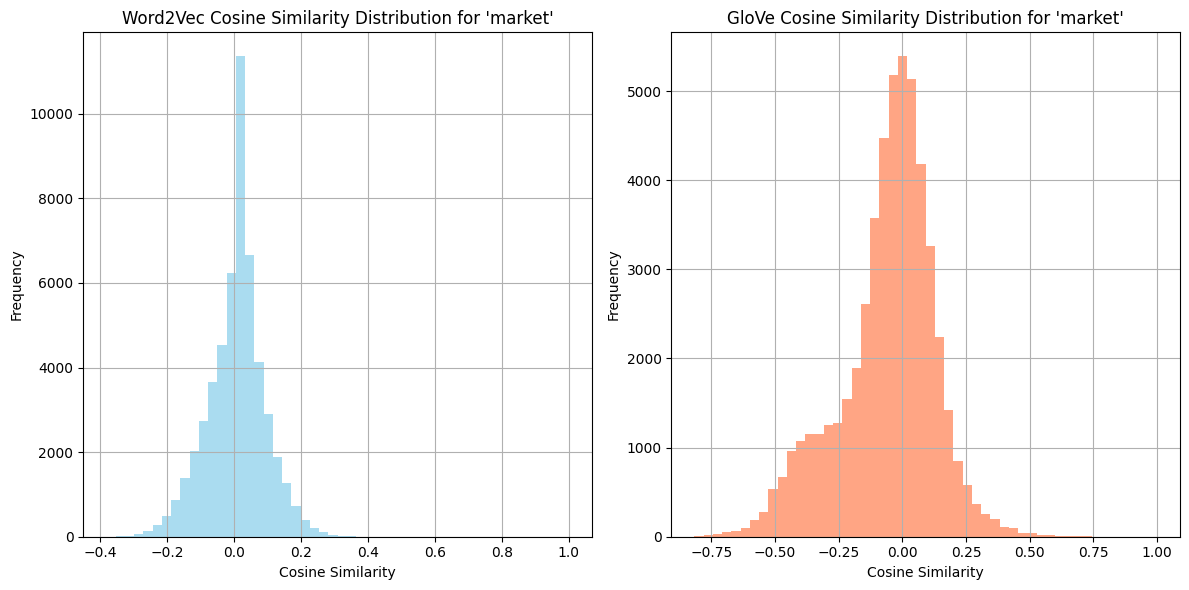

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity

# Load vocab and reverse mapping
with open("vocab.json", "r") as f:
    vocab = json.load(f)
word2idx = vocab["word2idx"]
idx2word = {int(v): k for k, v in word2idx.items()}

# Load embeddings
w2v = np.load("embeddings.npy")
glove = np.load("glove_embeddings.npy")

# Function to calculate cosine similarities for a given word
def calculate_similarities(word, embedding_matrix):
    if word not in word2idx:
        return f"{word} not in vocab."
    idx = word2idx[word]
    vec = embedding_matrix[idx].reshape(1, -1)
    sims = cosine_similarity(vec, embedding_matrix).flatten()
    return sims

# Choose a word for comparison
word = "market"  # You can change this to any word in your vocabulary

# Calculate similarities for both embeddings
w2v_sims = calculate_similarities(word, w2v)
glove_sims = calculate_similarities(word, glove)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(w2v_sims, bins=50, color='skyblue', alpha=0.7)
ax1.set_title(f"Word2Vec Cosine Similarity Distribution for '{word}'")
ax1.set_xlabel("Cosine Similarity")
ax1.set_ylabel("Frequency")
ax1.grid(True)

ax2.hist(glove_sims, bins=50, color='coral', alpha=0.7)
ax2.set_title(f"GloVe Cosine Similarity Distribution for '{word}'")
ax2.set_xlabel("Cosine Similarity")
ax2.set_ylabel("Frequency")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
!pip install numpy pandas tqdm

import numpy as np
import json
import pandas as pd
from tqdm import tqdm

# ─── Load Files ─────────────────────────────────────────────
with open("vocab.json", "r") as f:
    word2idx = json.load(f)["word2idx"]

with open("combined_dataset.json", "r") as f:
    data = json.load(f)

w2v = np.load("embeddings.npy")              # shape: (vocab_size, dim)
glove = np.load("glove_embeddings.npy")      # shape: (vocab_size, dim)

# ─── Mean Pooling Function ─────────────────────────────────
def mean_pool(tokens, embedding_matrix):
    # Filter tokens to only include those within the vocabulary of the embedding matrix
    vecs = [embedding_matrix[word2idx[t]] for t in tokens if t in word2idx and word2idx[t] < embedding_matrix.shape[0]]
    if vecs:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(embedding_matrix.shape[1])

# ─── Generate Both Datasets ────────────────────────────────
X_w2v, X_glove, y = [], [], []

for row in tqdm(data, desc="Pooling sentences"):
    tokens = row["tokens"]
    label = row["sentiment_num"]

    vec_w2v = mean_pool(tokens, w2v)
    vec_glove = mean_pool(tokens, glove)

    X_w2v.append(vec_w2v)
    X_glove.append(vec_glove)
    y.append(label)

X_w2v = np.array(X_w2v)
X_glove = np.array(X_glove)
y = np.array(y)

print(f"✅ W2V dataset shape: {X_w2v.shape}")
print(f"✅ GloVe dataset shape: {X_glove.shape}")
print(f"✅ Labels shape: {y.shape}")

Pooling sentences: 100%|██████████| 43921/43921 [00:03<00:00, 11909.82it/s]

✅ W2V dataset shape: (43921, 100)
✅ GloVe dataset shape: (43921, 100)
✅ Labels shape: (43921,)


In [ ]:
import pandas as pd
from google.colab import files

df_w2v = pd.DataFrame(X_w2v)
df_glove = pd.DataFrame(X_glove)
df_y = pd.DataFrame(y, columns=['sentiment'])

df_w2v_with_y = pd.concat([df_w2v, df_y], axis=1)

df_glove_with_y = pd.concat([df_glove, df_y], axis=1)

# Download Word2Vec dataset with y
df_w2v_with_y.to_csv('w2v_with_sentiment.csv', index=False)
files.download('w2v_with_sentiment.csv')

# Download GloVe dataset with y
df_glove_with_y.to_csv('glove_with_sentiment.csv', index=False)
files.download('glove_with_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>